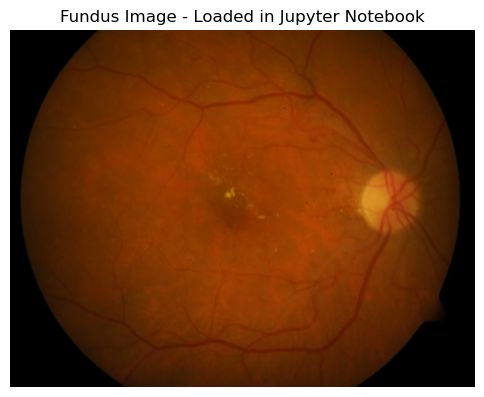

In [93]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the fundus images 
image = Image.open('images/diaretdb1_image001.png')

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off') 
plt.title("Fundus Image - Loaded in Jupyter Notebook")
plt.show()

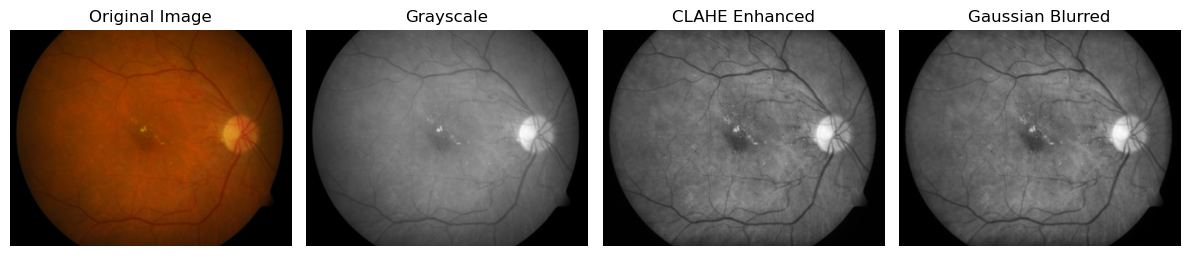

In [95]:
# AIM 1: Develop a preprocessing pipeline for retinal fundus images
# Import libraries
import cv2
import matplotlib.pyplot as plt

# Load the original fundus image
img = cv2.imread('images/diaretdb1_image001.png') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 1: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# Step 3: Apply Gaussian blur for noise reduction
gaussian_blur = cv2.GaussianBlur(clahe_img, (5, 5), 0)

# Display results
titles = ['Original Image', 'Grayscale', 'CLAHE Enhanced', 'Gaussian Blurred']
images = [img_rgb, gray, clahe_img, gaussian_blur]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray' if i != 0 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [97]:
import cv2
import os

# === Set paths ===
input_folder = 'images/'  # folder with original images
output_folder = 'preprocessed/'

# Create subfolders for preprocessed outputs
os.makedirs(os.path.join(output_folder, 'gray'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'clahe'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'blurred'), exist_ok=True)

# === Process each image ===
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        # Load image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Skipped: {filename} (could not read)")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_img = clahe.apply(gray)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(clahe_img, (5, 5), 0)

        # Save outputs
        name, _ = os.path.splitext(filename)
        cv2.imwrite(os.path.join(output_folder, 'gray', f'{name}_gray.png'), gray)
        cv2.imwrite(os.path.join(output_folder, 'clahe', f'{name}_clahe.png'), clahe_img)
        cv2.imwrite(os.path.join(output_folder, 'blurred', f'{name}_blurred.png'), blurred)

        print(f'Processed and saved: {filename}')

Processed and saved: diaretdb1_image074.png
Processed and saved: diaretdb1_image060.png
Processed and saved: diaretdb1_image048.png
Processed and saved: diaretdb1_image049.png
Processed and saved: diaretdb1_image061.png
Processed and saved: diaretdb1_image075.png
Processed and saved: diaretdb1_image088.png
Processed and saved: diaretdb1_image063.png
Processed and saved: diaretdb1_image077.png
Processed and saved: diaretdb1_image076.png
Processed and saved: diaretdb1_image062.png
Processed and saved: diaretdb1_image089.png
Processed and saved: diaretdb1_image066.png
Processed and saved: diaretdb1_image072.png
Processed and saved: diaretdb1_image073.png
Processed and saved: diaretdb1_image067.png
Processed and saved: diaretdb1_image059.png
Processed and saved: diaretdb1_image071.png
Processed and saved: diaretdb1_image065.png
Processed and saved: diaretdb1_image064.png
Processed and saved: diaretdb1_image070.png
Processed and saved: diaretdb1_image058.png
Processed and saved: diaretdb1_i

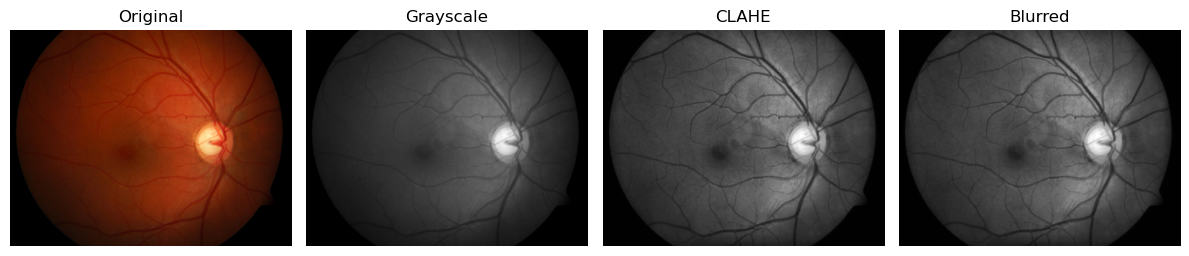

In [98]:
import matplotlib.pyplot as plt

sample_file = os.listdir(input_folder)[0]
img = cv2.imread(os.path.join(input_folder, sample_file))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe_img = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(gray)
blurred = cv2.GaussianBlur(clahe_img, (5,5), 0)

# Display
titles = ['Original', 'Grayscale', 'CLAHE', 'Blurred']
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), gray, clahe_img, blurred]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray' if i != 0 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [101]:
# AIM 2: Implement and refine blood vessel segmentation techniques
import cv2
import os
import numpy as np
from skimage.morphology import skeletonize
from skimage import img_as_bool, img_as_ubyte

# Paths
input_folder = 'preprocessed/blurred/'     # Preprocessed blurred images
output_folder = 'results/segmented/'       # Where you’ll save segmentation output
os.makedirs(output_folder, exist_ok=True)

# Loop through images
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Load preprocessed (blurred) image
        img_path = os.path.join(input_folder, filename)
        blurred = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if blurred is None:
            print(f"Could not read: {filename}")
            continue

        # Step 1: Canny Edge Detection
        edges = cv2.Canny(blurred, threshold1=30, threshold2=90)

        # Step 2: Morphological Operations to refine edges
        kernel = np.ones((3, 3), np.uint8)
        morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
        morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

        # Step 3 (Optional): Skeletonization
        skeleton = skeletonize(img_as_bool(morph))
        skeleton_uint8 = img_as_ubyte(skeleton)

        # Save segmented vessel output
        name, _ = os.path.splitext(filename)
        cv2.imwrite(os.path.join(output_folder, f'{name}_segmented.png'), skeleton_uint8)

        print(f'Segmented and saved: {filename}')

Segmented and saved: diaretdb1_image063_blurred.png
Segmented and saved: diaretdb1_image013_blurred.png
Segmented and saved: diaretdb1_image021_blurred.png
Segmented and saved: diaretdb1_image051_blurred.png
Segmented and saved: diaretdb1_image082_blurred.png
Segmented and saved: diaretdb1_image034_blurred.png
Segmented and saved: diaretdb1_image044_blurred.png
Segmented and saved: diaretdb1_image058_blurred.png
Segmented and saved: diaretdb1_image028_blurred.png
Segmented and saved: diaretdb1_image076_blurred.png
Segmented and saved: diaretdb1_image006_blurred.png
Segmented and saved: diaretdb1_image041_blurred.png
Segmented and saved: diaretdb1_image031_blurred.png
Segmented and saved: diaretdb1_image003_blurred.png
Segmented and saved: diaretdb1_image073_blurred.png
Segmented and saved: diaretdb1_image038_blurred.png
Segmented and saved: diaretdb1_image048_blurred.png
Segmented and saved: diaretdb1_image016_blurred.png
Segmented and saved: diaretdb1_image066_blurred.png
Segmented an

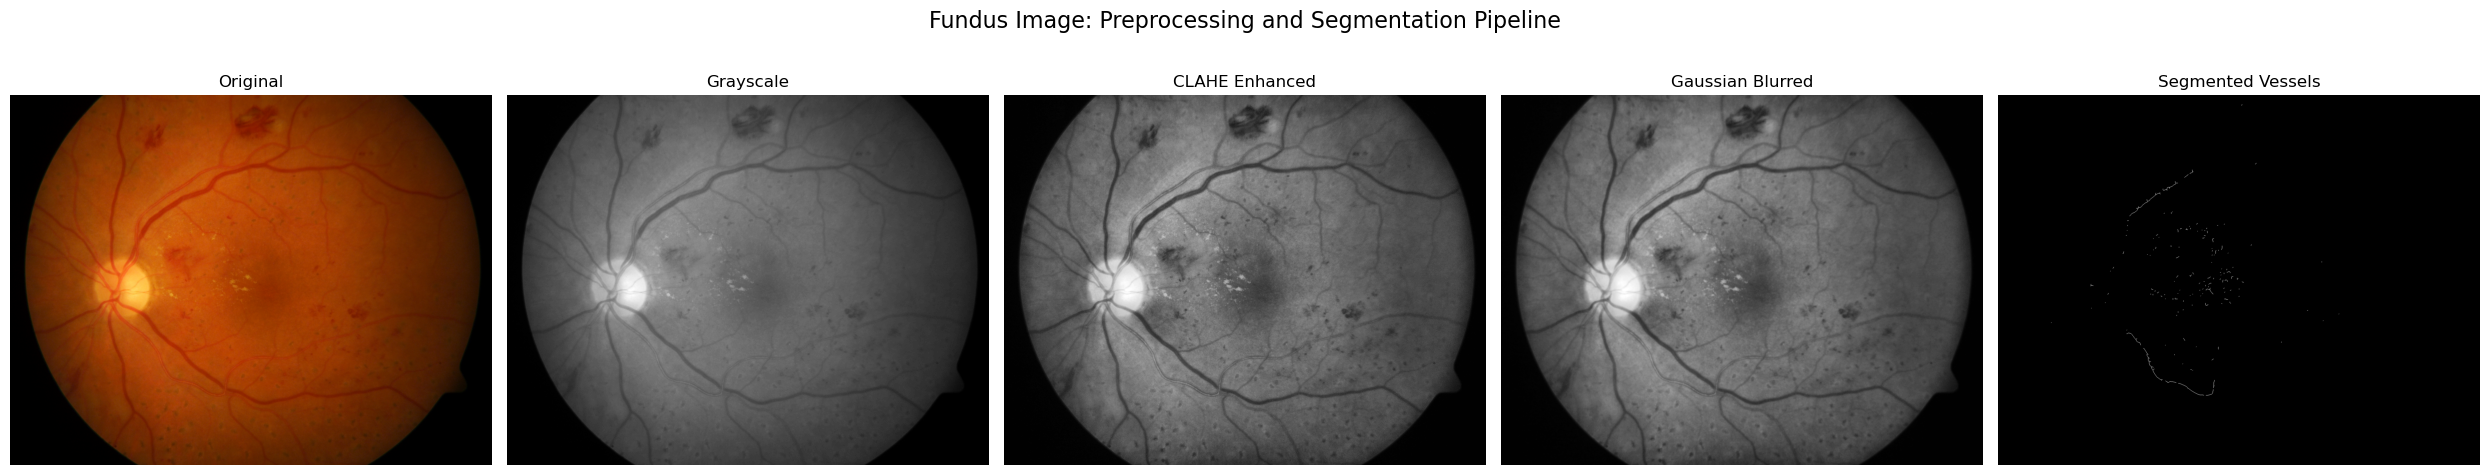

In [121]:
import cv2
import os
import matplotlib.pyplot as plt

# === Image identifiers ===
image_name = 'diaretdb1_image008.png'
image_base = os.path.splitext(image_name)[0]

# === File paths ===
paths = {
    'Original': os.path.join('images', image_name),
    'Grayscale': os.path.join('preprocessed', 'gray', f'{image_base}_gray.png'),
    'CLAHE Enhanced': os.path.join('preprocessed', 'clahe', f'{image_base}_clahe.png'),
    'Gaussian Blurred': os.path.join('preprocessed', 'blurred', f'{image_base}_blurred.png'),
    'Segmented Vessels': os.path.join('results', 'segmented', f'{image_base}_blurred_segmented.png')
}

# === Load and store available images silently ===
images = []
titles = []

for title, path in paths.items():
    if os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE if title != 'Original' else cv2.IMREAD_COLOR)
        if img is not None:
            if title == 'Original':
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            titles.append(title)

# === Display all loaded images ===
plt.figure(figsize=(5 * len(images), 5))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img, cmap='gray' if title != 'Original' else None)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Fundus Image: Preprocessing and Segmentation Pipeline", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()